In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
models_dict={}
parameters=['times','accuracies','macro_f1s','macro_f1s_train','accuracies_train']

### Metrics Graph ###

In [92]:
techniques = ['','JL','PCA','Undersampling','Coresets']
for technique in techniques:
    if technique=='':
        df = pd.read_csv(f"results\Models{technique}.csv")
    else:
        df = pd.read_csv(f"results\Models_{technique}.csv") 
    models = df.iloc[::,0]    
    df = df.set_index(df.columns[0])
    for parameter in parameters:
        if parameter not in models_dict:
            models_dict[parameter]={} 
        for model in models:
            if model not in models_dict[parameter]:
                models_dict[parameter][model]=[]    
            models_dict[parameter][model].append(df.loc[model,parameter])

    
models_dict

{'times': {'Naive_Bayes': [0.2980406284332275,
   0.1151657104492187,
   0.2087805271148681,
   0.0412232875823974,
   0.1241147518157959],
  'Logistic_Regression': [216.5667815208435,
   115.56804895401,
   140.9892921447754,
   34.83949518203735,
   120.5755684375763],
  'Random_Forest': [588.5416202545166,
   1534.3562140464785,
   552.5100529193878,
   77.16355180740356,
   293.37438559532166],
  'Decision_Tree': [25.924319744110107,
   116.0076870918274,
   31.20632123947144,
   5.967575550079346,
   15.636207818984984],
  'SVM': [14529.055001735687,
   82.43996930122375,
   98.16882061958312,
   8.36984634399414,
   49.39089298248291],
  'ADA_Boost': [170.2865092754364,
   476.2584640979767,
   194.58276677131653,
   27.24833989143372,
   111.66176056861876],
  'XG_Boost': [321.5975613594055,
   280.52527499198914,
   272.5029320716858,
   68.68328905105591,
   198.639794588089]},
 'accuracies': {'Naive_Bayes': [0.3257013230383385,
   0.3762698490975441,
   0.3139503754949065,
  

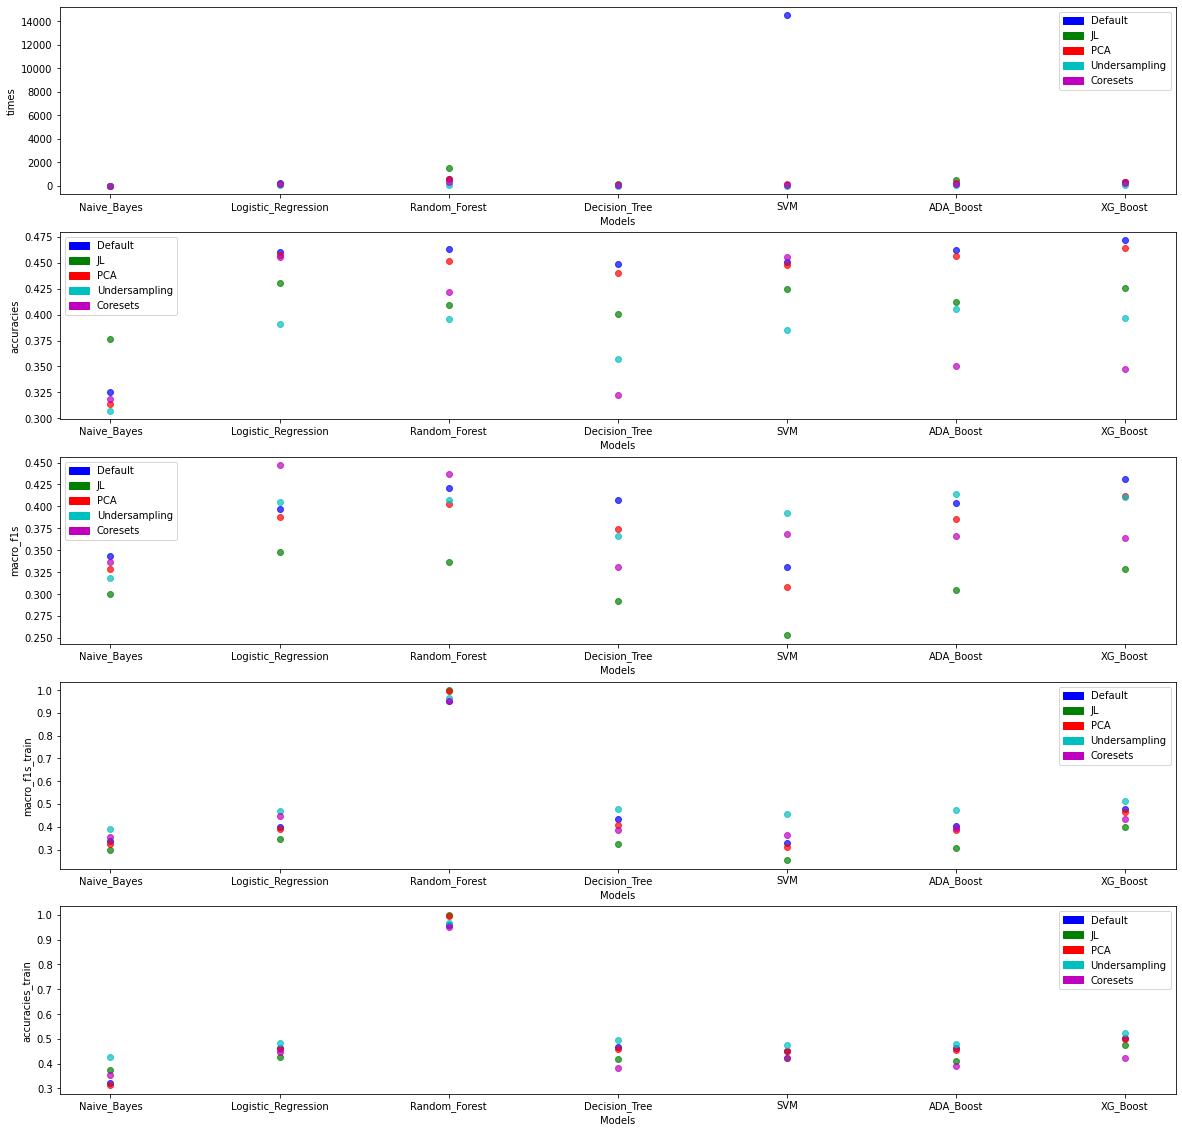

In [93]:
techniques = ['Default','JL','PCA','Undersampling','Coresets']
colors=['b','g','r','c','m']
patches=[mpatches.Patch(color=colors[i],label=techniques[i]) for i in range(len(techniques))]
fig,axes = plt.subplots(5,figsize=(20,20))
j=0
for parameter in models_dict:
    model_dict = models_dict[parameter]
    i=0
    for model, values in model_dict.items():
        for z in range(len(techniques)):
            axes[j].scatter([model],values[z],label = techniques[z],color=colors[z],alpha=0.7)
        i=i+1
    axes[j].legend(handles=patches)
    axes[j].set_ylabel(parameter)
    axes[j].set_xlabel('Models')
    j = (j+1)
plt.savefig("Comparison.PNG")

    